## Classification Model

In [4]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.model_selection import GridSearchCV

The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site.
Link of data is https://www.kaggle.com/jojoker/singapore-airbnb. 

## Data Description: 
Dataset consists of booking details of AirBnB in Singapore. Based on neighbourhood group, price, stay period, we have proposed to classify rome type. So, if someone wants enter in AirBnB business, person may classify its property based on several discussed factors by using our classification model.

In [5]:
#Reading the file
Singapore = pd.read_csv('listings.csv')
Singapore.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [6]:
Singapore.shape


(7907, 16)

In [7]:
Singapore.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
Singapore.dropna(inplace=True)

In [9]:
Singapore.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
Singapore.shape


(5148, 16)

In [11]:
Singapore['room_type'].value_counts()

Entire home/apt    2643
Private room       2228
Shared room         277
Name: room_type, dtype: int64

Due very less data of "Share room", we need to avoid it for analysis. We will now drop all rows with room type as "Shared room" type.

In [12]:
Singapore = Singapore[Singapore.room_type != 'Shared room']

In [13]:
Singapore.drop(columns=['id','host_name','name','host_id','latitude','longitude','last_review','neighbourhood'],inplace=True)




In [14]:
Singapore = pd.concat([Singapore.drop('neighbourhood_group', axis=1), pd.get_dummies(Singapore['neighbourhood_group'],
                                                                                   prefix='neighbourhood_group_')], 
                     axis=1) 

              


In [15]:
Singapore.head()


,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group__Central Region,neighbourhood_group__East Region,neighbourhood_group__North Region,neighbourhood_group__North-East Region,neighbourhood_group__West Region
0,Private room,83,180,1,0.01,2,365,0,0,1,0,0
1,Private room,81,90,18,0.28,1,365,1,0,0,0,0
2,Private room,69,6,20,0.20,2,365,0,0,1,0,0
3,Private room,206,1,14,0.15,9,353,0,1,0,0,0
4,Private room,94,1,22,0.22,9,355,0,1,0,0,0


## EDA

In [16]:
Singapore.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group__Central Region,neighbourhood_group__East Region,neighbourhood_group__North Region,neighbourhood_group__North-East Region,neighbourhood_group__West Region
count,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,157.610347,13.073496,19.781154,1.060242,36.018477,196.077807,0.797577,0.070211,0.021556,0.043523,0.067132
std,259.412552,33.193372,35.280573,1.306423,61.327234,142.282176,0.401847,0.255529,0.145244,0.204052,0.250276
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,2.000000,2.000000,0.180000,2.000000,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,119.000000,3.000000,6.000000,0.550000,8.000000,221.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,194.000000,7.000000,21.500000,1.390000,34.000000,342.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,700.000000,323.000000,13.000000,274.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000


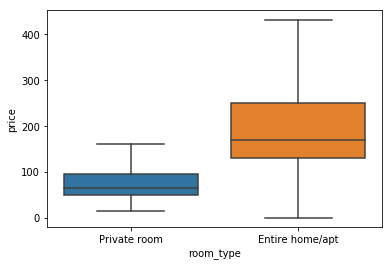

In [17]:
sns.boxplot(y="price",x="room_type",data=Singapore,showfliers=False)

Observation : Median of price of Entire home is higher than that of private and share room.

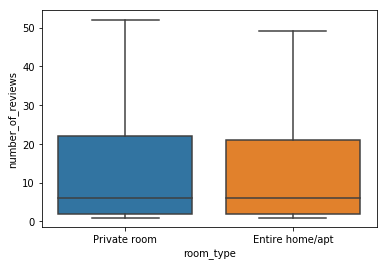

In [18]:
sns.boxplot(y="number_of_reviews",x="room_type",data=Singapore,showfliers=False)

Observation: Median of number of reviews of all three type is at similar level.

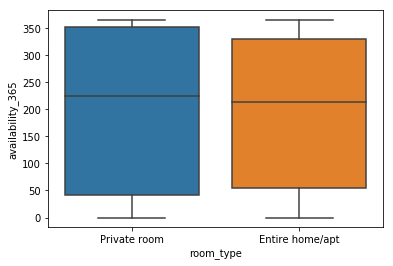

In [19]:
sns.boxplot(y="availability_365",x="room_type",data=Singapore,showfliers=False)

Observation: Shared room is having highest median availability. This means that Private room is least available.  

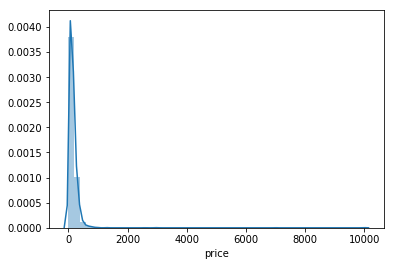

In [20]:
sns.distplot(Singapore["price"])

Price is concentrated from 0 to 1500 dollars.

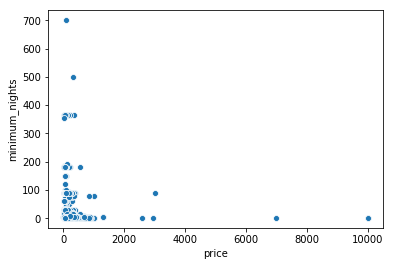

In [21]:
sns.scatterplot(x='price',y='minimum_nights',data=Singapore)

Observation: Lower price has more number of minimum number of night stay.

Scatter distribution of both the room type

<Figure size 792x504 with 0 Axes>

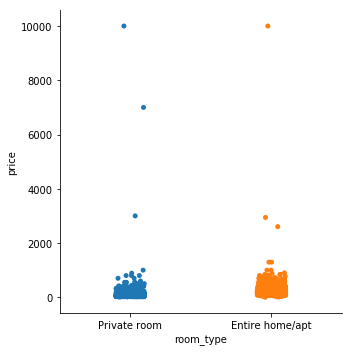

In [22]:
import plotly.offline as pyo
import plotly.graph_objs as go

plt.figure(figsize=(11,7))
sns.catplot(x="room_type", y="price", data=Singapore);
plt.ioff()

### Select dependent and independent variables as per following:

In [23]:
y = Singapore["room_type"]

In [24]:
X = Singapore.drop('room_type',axis=1)

Splitting dataset into test and train dataset with ratio of test size = 20% and train size = 80% of dataset. 

In [25]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_all = Singapore.drop('room_type', axis=1)
y_all = Singapore['room_type']
scaler = MinMaxScaler()
X_all = scaler.fit_transform(X_all)

In [26]:
models = ['KNN Classifier','Linear SVM','SVM_with Linear Kernel','Gaussian_SVM_Classification','Decision_Tree_Classifier','Logistics regression']
model_performance = pd.DataFrame(columns=['Accuracy','recall','f1_score'], index=models)

### Following classification models will be implemented and test score will be compared between them.


## KNN classification

KNN classification model to understand clustering of room type based on price, minimum nights stay, number of reviews, review per month, availability in 365 days, neighbourhood group.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
train_score_array = []
test_score_array = []
scores = []


for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    

Accuracy of test and train score

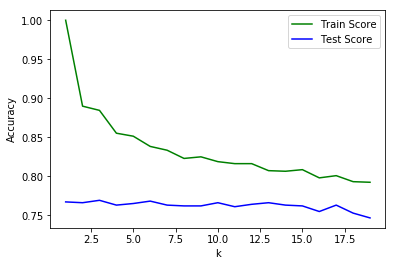

In [28]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

We need to check value of k so that having maximum test score and least difference in test & train score.

In [92]:
# try K=1 through K=18 and record testing accuracy
k_range = range(1, 18)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7671794871794871, 0.7661538461538462, 0.7692307692307693, 0.7630769230769231, 0.7651282051282051, 0.7682051282051282, 0.7630769230769231, 0.762051282051282, 0.762051282051282, 0.7661538461538462, 0.7610256410256411, 0.764102564102564, 0.7661538461538462, 0.7630769230769231, 0.762051282051282, 0.7548717948717949, 0.7630769230769231]


Testing accuracy score increases as model complexity increases. We have to select best combination of value of k with less model complexity. By, looking at the above graph, we can select value of k as 3.

In [93]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test))) 
y_pred1 = knn.predict(X_test)

Train score: 0.8845
Test score: 0.7692


In [94]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred1)

print("Confusion matrix:\n ", confusion_matrix(y_test, y_pred1))
print("Classification report KNN : \n", metrics.classification_report(y_test, y_pred1))
Classification_report_KNN = metrics.classification_report(y_test, y_pred1)


Confusion matrix:
  [[430 108]
 [117 320]]
Classification report KNN : 
                  precision    recall  f1-score   support

Entire home/apt       0.79      0.80      0.79       538
   Private room       0.75      0.73      0.74       437

       accuracy                           0.77       975
      macro avg       0.77      0.77      0.77       975
   weighted avg       0.77      0.77      0.77       975



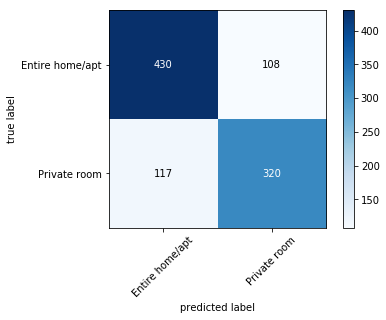

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
confusion1 = confusion_matrix(y_test, y_pred1 )
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion1,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=['Entire home/apt', 'Private room'])
plt.show()

In [95]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy1 = accuracy_score(y_test, y_pred1)
f1score = f1_score(y_test, y_pred1, average='weighted') 
recall = recall_score(y_test, y_pred1, average='weighted')
model_performance.loc['KNN Classifier'] = pd.Series({'Accuracy': accuracy1,'recall':recall,'f1_score':f1score})

In [96]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,NaN,NaN,NaN
SVM_with Linear Kernel,NaN,NaN,NaN
Gaussian_SVM_Classification,NaN,NaN,NaN
Decision_Tree_Classifier,NaN,NaN,NaN
Logistics regression,NaN,NaN,NaN


## Support Vector Machine Classification

### Linear SVM for classification

Linear SVM classify the dateset with boundary that divide dataset in such a way that data is classified into different classes. SVC defines decision boundary that is most optimal and maximizes the distance from the nearest data points.

#### Training the Linear SVM

We have already devided dataset into train and test. Now, we will train the Linear SVM by using training dataset and then predict using test dataset.

In [97]:
%matplotlib inline
from sklearn.svm import LinearSVC
# Create Linear SVC
linearsvc = LinearSVC()

linearsvc.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [98]:
y_pred2 = linearsvc.predict(X_test)

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
confusion2 = confusion_matrix(y_test, y_pred2 )
print("Confusion Matrix:\n" ,confusion_matrix(y_test,y_pred2))
print("classification_report Linear SVM:\n",classification_report(y_test,y_pred2))
Classification_report_Linear_SVM = metrics.classification_report(y_test, y_pred1)

Confusion Matrix:
 [[437 101]
 [183 254]]
classification_report Linear SVM:
                  precision    recall  f1-score   support

Entire home/apt       0.70      0.81      0.75       538
   Private room       0.72      0.58      0.64       437

       accuracy                           0.71       975
      macro avg       0.71      0.70      0.70       975
   weighted avg       0.71      0.71      0.70       975



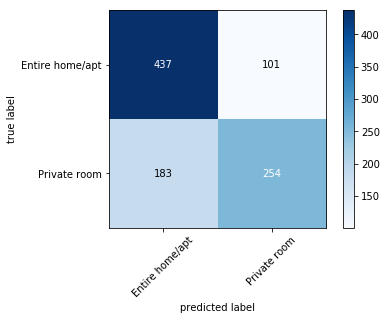

In [150]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion2,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=['Entire home/apt', 'Private room'])
plt.show()

In [101]:
accuracy1 = accuracy_score(y_test, y_pred2)
f1score = f1_score(y_test, y_pred2, average='weighted') 
recall = recall_score(y_test, y_pred2, average='weighted')
model_performance.loc['Linear SVM'] = pd.Series({'Accuracy': accuracy1,'recall':recall,'f1_score':f1score})

In [102]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,0.708718,0.708718,0.703952
SVM_with Linear Kernel,NaN,NaN,NaN
Gaussian_SVM_Classification,NaN,NaN,NaN
Decision_Tree_Classifier,NaN,NaN,NaN
Logistics regression,NaN,NaN,NaN


### SVM with Linear Kernel

In [103]:
from sklearn import svm
#making the instance
model=svm.SVC(kernel='linear')

#Hyper Parameters Set
params = {'C': [1, 10, 100],
          'gamma': [0.01, 0.1, 1, 10]}
#Making models with hyper parameters sets
model3 = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=5)
#Learning
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model3.best_params_)


Best Hyper Parameters:
 {'C': 100, 'gamma': 0.01}


In [146]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
confusion3 = metrics.confusion_matrix(y_test, y_pred3 )
print("Confusion Matrix:\n" , metrics.confusion_matrix(y_test,y_pred3))
print("classification_report SVM with Linear Kernel:\n", metrics.classification_report(y_test,y_pred3))

Confusion Matrix:
 [[432 106]
 [ 48 389]]
classification_report SVM with Linear Kernel:
                  precision    recall  f1-score   support

Entire home/apt       0.90      0.80      0.85       538
   Private room       0.79      0.89      0.83       437

       accuracy                           0.84       975
      macro avg       0.84      0.85      0.84       975
   weighted avg       0.85      0.84      0.84       975



In [147]:
accuracy1 = accuracy_score(y_test, y_pred3)
f1score = f1_score(y_test, y_pred3, average='weighted') 
recall = recall_score(y_test, y_pred3, average='weighted')
model_performance.loc['SVM_with Linear Kernel'] = pd.Series({'Accuracy': accuracy1,'recall':recall,'f1_score':f1score})

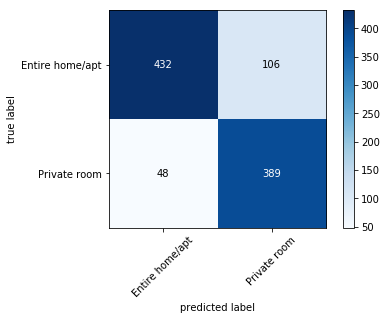

In [148]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion3,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=['Entire home/apt', 'Private room'])
plt.show()

In [106]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,0.708718,0.708718,0.703952
SVM_with Linear Kernel,0.842051,0.842051,0.842466
Gaussian_SVM_Classification,NaN,NaN,NaN
Decision_Tree_Classifier,NaN,NaN,NaN
Logistics regression,NaN,NaN,NaN


## Gaussian SVM Classification

In [107]:
from sklearn import svm
#making the instance
model=svm.SVC(kernel='rbf')

#Hyper Parameters Set
params = {'C': np.logspace(0, 4, 10),
          'gamma': [0.01, 0.1, 1, 10]}
#Making models with hyper parameters sets
model5 = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=5)
#Learning
model5.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model5.best_params_)
#Prediction
y_pred5=model5.predict(X_test)


Best Hyper Parameters:
 {'C': 10000.0, 'gamma': 1}


In [143]:
from sklearn.metrics import classification_report, confusion_matrix
confusion5 = confusion_matrix(y_test, y_pred5 )
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[480  58]
 [ 57 380]]
                 precision    recall  f1-score   support

Entire home/apt       0.89      0.89      0.89       538
   Private room       0.87      0.87      0.87       437

       accuracy                           0.88       975
      macro avg       0.88      0.88      0.88       975
   weighted avg       0.88      0.88      0.88       975



In [144]:
accuracy1 = accuracy_score(y_test, y_pred5)
f1score = f1_score(y_test, y_pred5, average='weighted') 
recall = recall_score(y_test, y_pred5, average='weighted')
model_performance.loc['Gaussian_SVM_Classification'] = pd.Series({'Accuracy': accuracy1,'recall':recall,'f1_score':f1score})

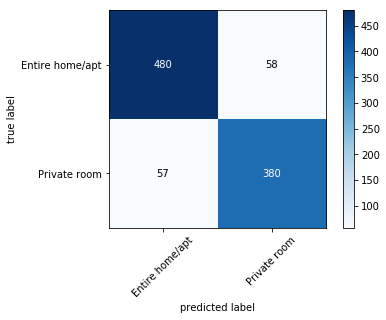

In [145]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion5,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=['Entire home/apt', 'Private room'])
plt.show()

In [110]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,0.708718,0.708718,0.703952
SVM_with Linear Kernel,0.842051,0.842051,0.842466
Gaussian_SVM_Classification,0.882051,0.882051,0.882064
Decision_Tree_Classifier,NaN,NaN,NaN
Logistics regression,NaN,NaN,NaN


## Decision Tree Classifier

Decision tree classifier has been trained. Now, we have to make predictions on the test dataset. Following predict method has been used to predict the class in test data set

In [111]:
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=0)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[0]}

In [112]:
#Making models with hyper parameters sets
model6 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model6.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model6.best_params_)
#Prediction
y_pred6=model6.predict(X_test)


C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


#### Evaluation of model prediction

We have completed training our model and made prediction using test data. Now, we need to check how accurate our model works.

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
confusion = confusion_matrix(y_test, y_pred6 )
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[487  51]
 [ 65 372]]
                 precision    recall  f1-score   support

Entire home/apt       0.88      0.91      0.89       538
   Private room       0.88      0.85      0.87       437

       accuracy                           0.88       975
      macro avg       0.88      0.88      0.88       975
   weighted avg       0.88      0.88      0.88       975



In [114]:
accuracy1 = accuracy_score(y_test, y_pred6)
f1score = f1_score(y_test, y_pred6, average='weighted') 
recall = recall_score(y_test, y_pred6, average='weighted')
model_performance.loc['Decision_Tree_Classifier'] = pd.Series({'Accuracy': accuracy1,'recall':recall,'f1_score':f1score})

Let's plot confusion matrix

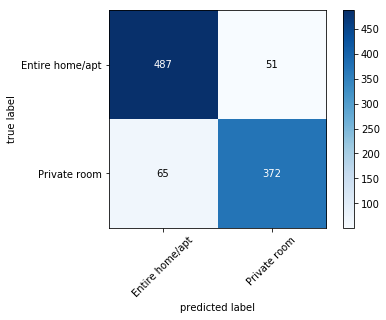

In [115]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=['Entire home/apt', 'Private room'])
plt.show()

From confusion matrix, our model has precision of 0.88 for Entire home/apt, 0.85 for Private room and 0.72 for Shared room.

In [117]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,0.708718,0.708718,0.703952
SVM_with Linear Kernel,0.842051,0.842051,0.842466
Gaussian_SVM_Classification,0.882051,0.882051,0.882064
Decision_Tree_Classifier,0.881026,0.881026,0.880821
Logistics regression,NaN,NaN,NaN


### Logistics Regression

In [118]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
print(lr.coef_)
print(lr.intercept_)

[[-7.03873065  0.72273433  0.22206829 -1.34955106 -4.03792686  0.76747356
  -0.87989296  0.41254104  0.29866711  0.59198042  0.2632766 ]]
[0.68657221]


In [133]:
y_pred7 = lr.predict(X_test)

In [134]:
confusion_matrix(y_test, y_pred7)

array([[424, 114],
       [194, 243]], dtype=int64)

In [139]:
accuracy = accuracy_score(y_test, y_pred7)
from sklearn.metrics import classification_report, confusion_matrix
confusion7 = confusion_matrix(y_test, y_pred7 )
print("Confusion matrix:\n ", confusion_matrix(y_test, y_pred7))
print("Classification report KNN : \n", metrics.classification_report(y_test, y_pred7))
Classification_report_KNN = metrics.classification_report(y_test, y_pred7)


Confusion matrix:
  [[424 114]
 [194 243]]
Classification report KNN : 
                  precision    recall  f1-score   support

Entire home/apt       0.69      0.79      0.73       538
   Private room       0.68      0.56      0.61       437

       accuracy                           0.68       975
      macro avg       0.68      0.67      0.67       975
   weighted avg       0.68      0.68      0.68       975



In [140]:
accuracy1 = accuracy_score(y_test, y_pred2)
f1score = f1_score(y_test, y_pred2, average='weighted') 
recall = recall_score(y_test, y_pred2, average='weighted')
model_performance.loc['Logistics regression'] = pd.Series({'Accuracy': accuracy1,'recall':recall,'f1_score':f1score})

In [141]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,0.708718,0.708718,0.703952
SVM_with Linear Kernel,0.842051,0.842051,0.842466
Gaussian_SVM_Classification,0.882051,0.882051,0.882064
Decision_Tree_Classifier,0.881026,0.881026,0.880821
Logistics regression,0.708718,0.708718,0.703952


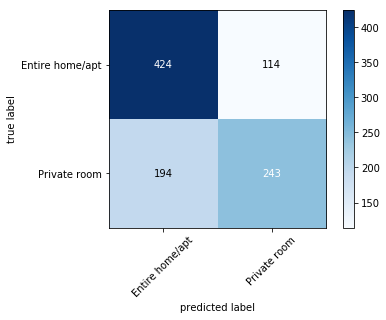

In [142]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion7,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=['Entire home/apt', 'Private room'])
plt.show()

##  Which model gives the best results?

In [166]:
model_performance

,Accuracy,recall,f1_score
KNN Classifier,0.769231,0.769231,0.768987
Linear SVM,0.708718,0.708718,0.703952
SVM_with Linear Kernel,0.842051,0.842051,0.842466
Gaussian_SVM_Classification,0.882051,0.882051,0.882064
Decision_Tree_Classifier,0.881026,0.881026,0.880821
Logistics regression,0.708718,0.708718,0.703952


By looking at summary of model performance, we can finalize that Gaussian_SVM classfier is performing best amoung the other classifier.

## Regression Project

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant. Link of data is https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

We have to do regression to predict the cost of the two people dining out.

In [181]:
#Reading the dataset
zomato = pd.read_csv('zomato.csv')
#Taking look at the dataset
zomato.head() 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [182]:
#shape of the dataset
zomato.shape


(51717, 17)

In [183]:
#Summing Null values for the dataset 
zomato.isnull().sum() 


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [184]:
#dropping the null values in the dataset
zomato.dropna(inplace=True)


In [185]:
#again checking if some columns have null values
zomato.isnull().sum() 


url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [186]:
#final shape of the dataset
zomato.shape


(23193, 17)

In [187]:
zomato['listed_in(city)'].value_counts()

BTM                      1423
Koramangala 7th Block    1367
Koramangala 4th Block    1342
Koramangala 5th Block    1305
Koramangala 6th Block    1247
Jayanagar                1048
Indiranagar              1021
MG Road                  1015
Church Street             979
Brigade Road              965
Lavelle Road              897
Residency Road            843
JP Nagar                  821
Old Airport Road          748
HSR                       737
Whitefield                630
Marathahalli              621
Basavanagudi              597
Brookefield               595
Bannerghatta Road         547
Frazer Town               545
Kammanahalli              532
Kalyan Nagar              519
Bellandur                 502
Sarjapur Road             501
Malleshwaram              492
Rajajinagar               374
Banashankari              372
Electronic City           326
New BEL Road              282
Name: listed_in(city), dtype: int64

# EDA

Text(0.5, 1.0, 'Restaurants delivering online or Not')

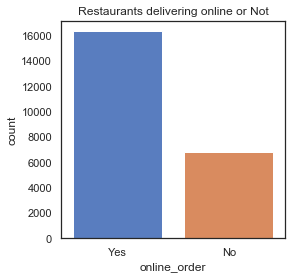

In [188]:
#Resturants delivering online
sns.countplot(x=zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Restaurants delivering online or Not')

Observation: The graph shows resturants which deliver food online or not. Thus there are more restaurants which order online rather than which do not.

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

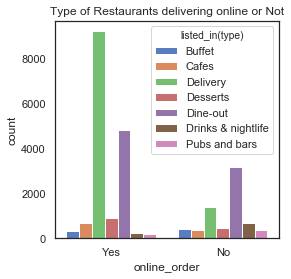

In [189]:
#Type of resturants delivering or not
sns.countplot(x=zomato['online_order'], hue = zomato['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Type of Restaurants delivering online or Not')

Observation: The graph shows the comparision of types of service the resturants give and they deliver food online and which do not. 

Text(0.5, 1.0, 'Restaurants providing Table booking facility:')

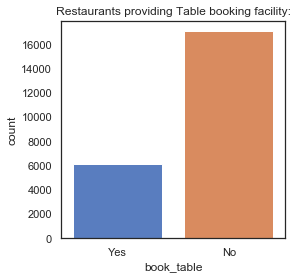

In [190]:
#Restaurants providing Table booking facility
sns.countplot(x=zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Restaurants providing Table booking facility:')

Observation: The graph shows the resturants which have the facility of booking table and which not. The graph shows that there are more resturants which do not book table rather than which book.

Text(0.5, 1.0, 'Type Of Restaurants providing Table booking facility:')

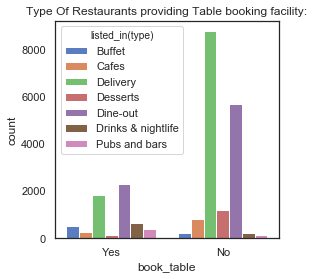

In [191]:
sns.countplot(x=zomato['book_table'],hue = zomato['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Type Of Restaurants providing Table booking facility:')

Observation: The graph shows the comparision of types of service the resturants give and they book table online and which do not. 

In [192]:
#Removing '/5' from the rate attribute
zomato['rate_trans']=zomato['rate'].apply(lambda x: x.replace('/5','')) 

In [193]:
#Removing NEW value from rate attribute
zomato = zomato[zomato.rate_trans != 'NEW']

In [194]:
# Changing data type rate from string(object) to float
zomato['rate_trans'] = zomato['rate_trans'].astype(float)

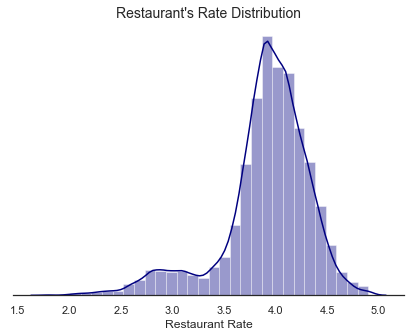

In [195]:
sns.set(style='white', palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(7, 5))
sns.despine(left=True)
sns.distplot(zomato['rate_trans'], bins=30, color='navy')
ax.set_title("Restaurant's Rate Distribution", size=14)
ax.set_xlabel('Restaurant Rate')
plt.setp(ax, yticks=[])
plt.show()

Observation: The histogram shows the distribution of resturants rate. The average rate of the resturants is almost 4 out of 5

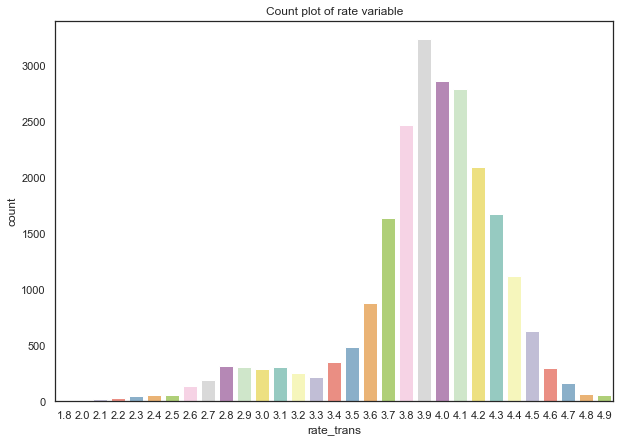

In [196]:
#plot the count of rating.
plt.rcParams['figure.figsize'] = 10,7
sns.countplot(zomato["rate_trans"], palette="Set3")
plt.title("Count plot of rate variable")
plt.show()

Observation: The graph shows the bar chart for all the resturant rate distribution

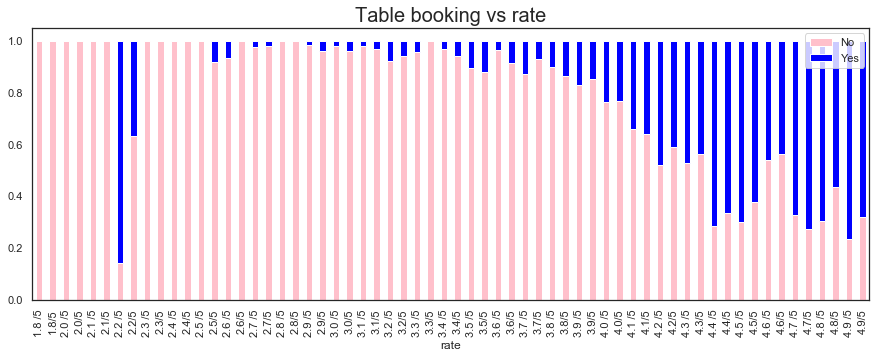

In [197]:
#Table booking Rate vs Rate
plt.rcParams['figure.figsize'] = (15, 5)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['pink','blue'])
plt.title('Table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Observation: The graph shows the table booking with rate. The resturants which have high rating they have high number of table bookings.

Text(0.5, 1.0, 'Location')

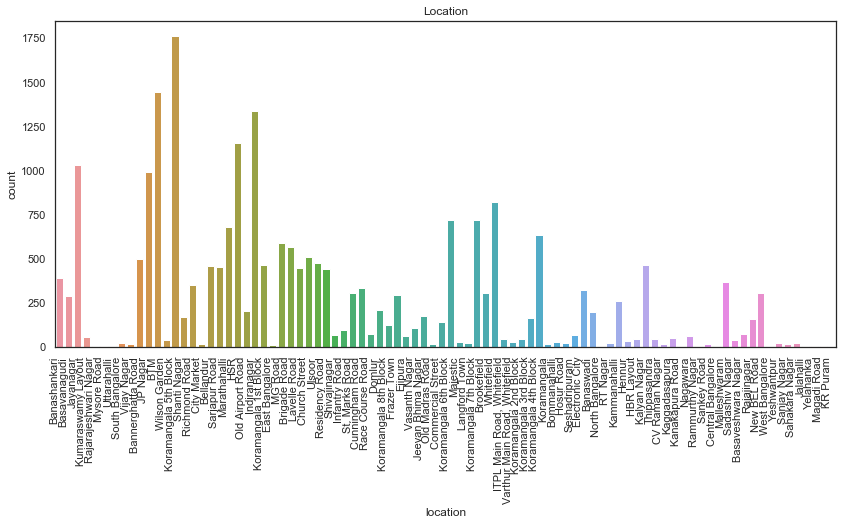

In [198]:
# Location
sns.countplot(zomato['location'])
sns.countplot(zomato['location']).set_xticklabels(sns.countplot(zomato['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(14,6)
plt.title('Location')


Observation: The graph shows the number of resturants in a particular location. The most number of resturants are located in Kormangala.

Text(0.5, 1.0, 'Type of Service')

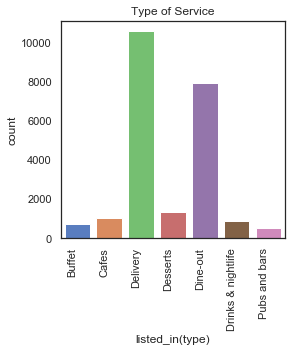

In [199]:
#Types of Services
sns.countplot(zomato['listed_in(type)'])
sns.countplot(zomato['listed_in(type)']).set_xticklabels(sns.countplot(zomato['listed_in(type)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Type of Service')

Observation: The graph shows the type of service given by resturants. 

Text(0.5, 1.0, 'Cost of Restuarant')

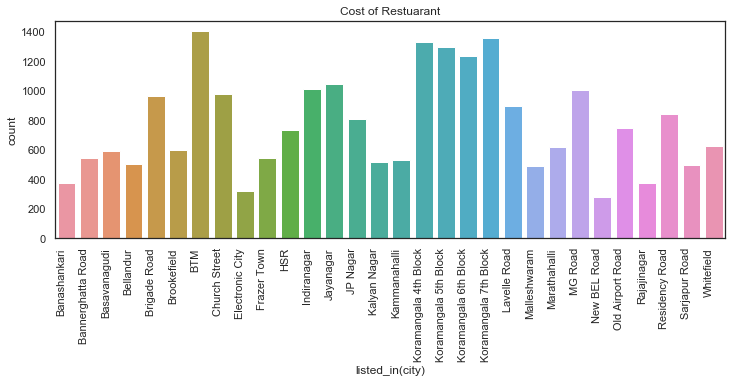

In [200]:
#Cost of Restuarant
sns.countplot(zomato['listed_in(city)'])
sns.countplot(zomato['listed_in(city)']).set_xticklabels(sns.countplot(zomato['listed_in(city)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,4)
plt.title('Cost of Restuarant')

Observation: Cost of dining out in different location. BTM area has the most costly resturants

Text(0.5, 1.0, 'Cost of Restuarant')

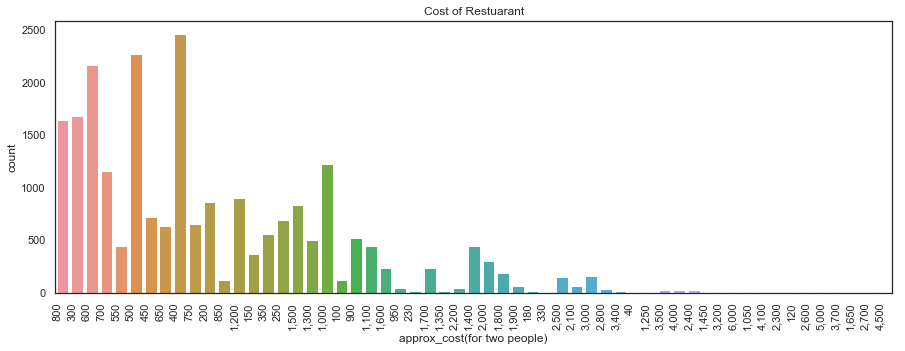

In [201]:
#Cost of Restuarant
sns.countplot(zomato['approx_cost(for two people)'])
sns.countplot(zomato['approx_cost(for two people)']).set_xticklabels(sns.countplot(zomato['approx_cost(for two people)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Cost of Restuarant')

Observation: The avaergae cost of eating out for two people is Rs 750.

# Modelling of Data

In [202]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_trans
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [203]:
#dropping some of the attributes
zomato.drop(columns=['url','address','name','phone','location','rest_type','dish_liked','cuisines','menu_item',
                     'reviews_list','rate_trans'],inplace=True) 


In [204]:
#Removing some places or location which have less than 1000 resturants from listed_in(city) attribute
zomato = zomato[zomato['listed_in(city)'] != 'Church Street']
zomato = zomato[zomato['listed_in(city)'] != 'Brigade Road']
zomato = zomato[zomato['listed_in(city)'] != 'Lavelle Road']
zomato = zomato[zomato['listed_in(city)'] != 'Residency Road']
zomato = zomato[zomato['listed_in(city)'] != 'JP Nagar']
zomato = zomato[zomato['listed_in(city)'] != 'Old Airport Road']
zomato = zomato[zomato['listed_in(city)'] != 'HSR']
zomato = zomato[zomato['listed_in(city)'] != 'Whitefield']
zomato = zomato[zomato['listed_in(city)'] != 'Marathahalli']
zomato = zomato[zomato['listed_in(city)'] != 'Basavanagudi']
zomato = zomato[zomato['listed_in(city)'] != 'Brookefield']
zomato = zomato[zomato['listed_in(city)'] != 'Bannerghatta Road']
zomato = zomato[zomato['listed_in(city)'] != 'Frazer Town']
zomato = zomato[zomato['listed_in(city)'] != 'Kammanahalli']
zomato = zomato[zomato['listed_in(city)'] != 'Kalyan Nagar']
zomato = zomato[zomato['listed_in(city)'] != 'Bellandur'] 
zomato = zomato[zomato['listed_in(city)'] != 'Brookefield']
zomato = zomato[zomato['listed_in(city)'] != 'Sarjapur Road']
zomato = zomato[zomato['listed_in(city)'] != 'Malleshwaram']
zomato = zomato[zomato['listed_in(city)'] != 'Rajajinagar']
zomato = zomato[zomato['listed_in(city)'] != 'Banashankari']
zomato = zomato[zomato['listed_in(city)'] != 'Electronic City'] 
zomato = zomato[zomato['listed_in(city)'] != 'New BEL Road']

zomato['listed_in(city)'].value_counts()

BTM                      1404
Koramangala 7th Block    1357
Koramangala 4th Block    1331
Koramangala 5th Block    1293
Koramangala 6th Block    1237
Jayanagar                1042
Indiranagar              1011
MG Road                  1007
Name: listed_in(city), dtype: int64

In [205]:
zomato.dtypes

online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [206]:
#Changing listed_in(type) into dummy variables
zomato = pd.concat([zomato.drop('listed_in(type)', axis=1), pd.get_dummies(zomato['listed_in(type)'],prefix='listed_in(type)_')], 
                     axis=1)

zomato = pd.concat([zomato.drop('listed_in(city)', axis=1), pd.get_dummies(zomato['listed_in(city)'],
                                                                                  prefix='listed_in(city)_')], 
                    axis=1) 

In [207]:
zomato.head()


,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)__Buffet,listed_in(type)__Cafes,listed_in(type)__Delivery,listed_in(type)__Desserts,listed_in(type)__Dine-out,listed_in(type)__Drinks & nightlife,listed_in(type)__Pubs and bars,listed_in(city)__BTM,listed_in(city)__Indiranagar,listed_in(city)__Jayanagar,listed_in(city)__Koramangala 4th Block,listed_in(city)__Koramangala 5th Block,listed_in(city)__Koramangala 6th Block,listed_in(city)__Koramangala 7th Block,listed_in(city)__MG Road
8260,No,Yes,4.9/5,6375,"1,600",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8261,No,Yes,4.4/5,201,"1,300",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8262,Yes,Yes,4.2/5,3230,"1,600",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8263,No,Yes,4.4/5,1149,"1,100",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8264,Yes,No,3.9/5,420,800,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [208]:
#Changing online_order into 1 or 0
zomato['online_order']=zomato['online_order'].map({'Yes': 0, 'No': 1})

In [209]:
#Changing book_table into 1 or 0
zomato['book_table']=zomato['book_table'].map({'Yes': 0, 'No': 1})

In [210]:
#Replacing ',' with ''
zomato['approx_cost(for two people)']=zomato['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))


In [211]:
#Converting obejct type into float
zomato['approx_cost(for two people)']=zomato['approx_cost(for two people)'].astype(dtype=np.float64)

In [212]:
#Dropping the 'NEW' values in rate attribute
zomato = zomato[zomato.rate != 'NEW']

In [213]:
#Removing '/5' from frate attribute
zomato['rate']=zomato['rate'].apply(lambda x: x.replace('/5',''))

# Regression

In [214]:
# target variable is 'approx_cost(for two people)'

Y = zomato["approx_cost(for two people)"]
X = zomato.drop('approx_cost(for two people)',axis=1)

In [215]:
zomato.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)__Buffet,listed_in(type)__Cafes,listed_in(type)__Delivery,listed_in(type)__Desserts,listed_in(type)__Dine-out,listed_in(type)__Drinks & nightlife,listed_in(type)__Pubs and bars,listed_in(city)__BTM,listed_in(city)__Indiranagar,listed_in(city)__Jayanagar,listed_in(city)__Koramangala 4th Block,listed_in(city)__Koramangala 5th Block,listed_in(city)__Koramangala 6th Block,listed_in(city)__Koramangala 7th Block,listed_in(city)__MG Road
8260,1,0,4.9,6375,1600.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8261,1,0,4.4,201,1300.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8262,0,0,4.2,3230,1600.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8263,1,0,4.4,1149,1100.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8264,0,1,3.9,420,800.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Splitting of the data set and we have used standard scaling. 
Standard scaling works well with Regression

In [216]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [217]:
#Shape of the train and test data

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (7745, 19)
y_train shape:  (7745,)
X_test shape:  (1937, 19)
y_test shape (1937,)


In [218]:
regmodel_perfo = pd.DataFrame(columns=['Train Score','Test Score','Average CV Score','Best Parameters'])

# Data Modelling

## Linear Regression

In [219]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)

train_score = lreg.score(X_train, y_train)
test_score = lreg.score(X_test, y_test)

print('Train Score',train_score)
print('Test Score',test_score) 

print('linear model coeff (w): {}\n'.format(lreg.coef_))
print('linear model intercept (b): {:.3f}\n'.format(lreg.intercept_))
print('R-squared score (training): {:.3f}\n'.format(lreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lreg.score(X_test, y_test)))

Train Score 0.5161265532231285
Test Score 0.48863318084556906
linear model coeff (w): [ 4.72620832e+01 -2.17115365e+02  4.33535820e+01  4.74573554e+01
 -1.83028525e+15 -2.35497353e+15 -5.38022161e+15 -2.60478517e+15
 -5.06143660e+15 -2.06385657e+15 -1.64205954e+15  7.23152502e+14
  6.23925282e+14  6.32695184e+14  6.99293255e+14  6.93363631e+14
  6.80331747e+14  7.07054696e+14  6.25966669e+14]

linear model intercept (b): 724.968

R-squared score (training): 0.516

R-squared score (test): 0.489


Text(0.5, 1.0, 'Cost Vs. Rating')

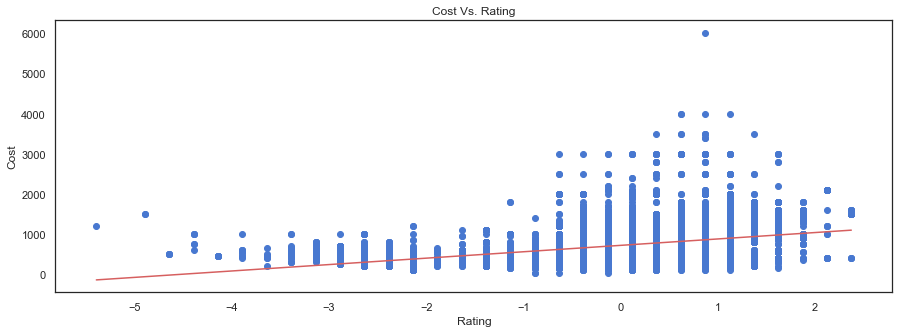

In [220]:
X_b = X_train[:,2].reshape(-1,1)
y_b = y_train[:]

regressor = LinearRegression()

regressor.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressor.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.title('Cost Vs. Rating')

In [221]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train, y_train,cv=3)
print("Cross-validation scores train: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

scores = cross_val_score(LinearRegression(), X_test, y_test,cv=3)
print("Cross-validation scores test: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean())) 

regmodel_perfo.loc['Linear Regression'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':scores.mean(),'Best Parameters':''})

Cross-validation scores train: [0.52092347 0.49078779 0.52981378]
Average cross-validation score: 0.5138
Cross-validation scores test: [0.51972653 0.4733657  0.47568826]
Average cross-validation score: 0.4896


## Ridge Regression

Cross-validation scores train: [0.51532756 0.4822442  0.52821557]
Cross-validation scores test: [0.46635874 0.42084052 0.43475039]


C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



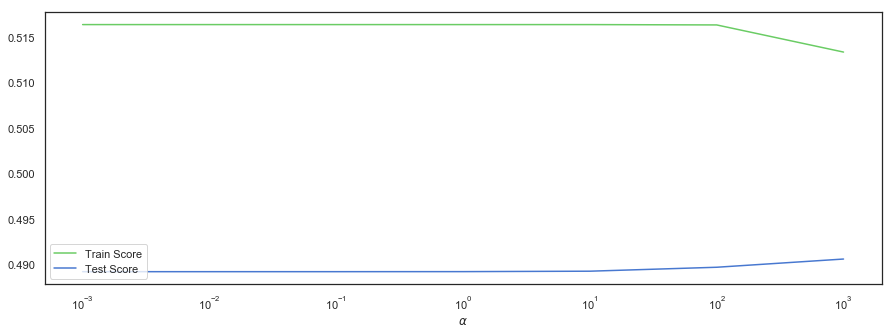

In [222]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# Ridge uses L2 Penalty

# Defining values for hyperparameter alpha
alpha = [0.001,0.01, 0.1, 1, 10, 100,1000]

train_score_list = []
test_score_list = []

# Fitting models for different values of alpha
for i in alpha: 
    ridge = Ridge(i)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(alpha, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$') 

scores = cross_val_score(ridge, X_train, y_train)
print("Cross-validation scores train: {}".format(scores)) 

scores_test = cross_val_score(ridge, X_test, y_test)
print("Cross-validation scores test: {}".format(scores_test))

In [223]:
#Grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))


Best parameters: {'alpha': 100}


In [224]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

print('Train score on best parameters {}'.format(ridge.score(X_train,y_train)))
print('Test score on best parameters {}'.format(ridge.score(X_test,y_test))) 

print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Average cross-validation score: {:.2f}".format(scores_test.mean()))

regmodel_perfo.loc['Ridge'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':scores.mean(),'Best Parameters':''})

Train score on best parameters 0.5163341497137299
Test score on best parameters 0.48965579741055965
Average cross-validation score: 0.51
Average cross-validation score: 0.44


# Laaso

In [225]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87725431.00450915, tolerance: 176890.6358992899



Text(0.5, 0, '$\\alpha$')

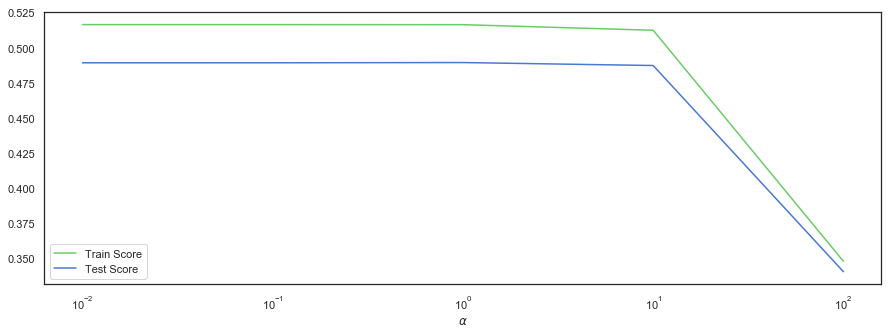

In [226]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [227]:
#Grid search
param_grid = {'alpha': [0.001, 0.01, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 71327674.32007211, tolerance: 140787.75804228548

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 68877641.79106462, tolerance: 141346.48003227884

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 66270426.982669175, tolerance: 136378.19762911563

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might w

Best parameters: {'alpha': 1}
Best cross-validation score: 0.5150


In [228]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)

print('Train score on best parameters {}'.format(lasso.score(X_train,y_train)))
print('Test score on best parameters {}'.format(lasso.score(X_test,y_test))) 

print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Average cross-validation score: {:.2f}".format(scores_test.mean())) 

regmodel_perfo.loc['Lasso'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':scores.mean(),'Best Parameters':''}).loc['Lasso Regression'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':grid_search.best_score_,'Best Parameters':grid_search.best_params_})

Train score on best parameters 0.5163220440882772
Test score on best parameters 0.4893494877998358
Average cross-validation score: 0.51
Average cross-validation score: 0.44


# Polynomial Regession

In [229]:
poly = PolynomialFeatures(degree=2)
lreg_poly =LinearRegression()
X_train_reduced_poly =poly.fit_transform(X_train)
X_test_reduced_poly =poly.fit_transform(X_test)
lreg_poly.fit(X_train_reduced_poly, y_train)

param_grid_poly = {
            'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]
            }
grid_poly = GridSearchCV(estimator =lreg_poly,cv=5 ,param_grid=param_grid_poly, verbose=1, n_jobs=-1, scoring= None)
grid_poly.fit(X_train_reduced_poly, y_train)

best_parameters_poly=grid_poly.best_params_
print(best_parameters_poly)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   15.2s finished


{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [230]:
y_pred_poly=grid_poly.predict(X_test_reduced_poly)

TR_poly =round(grid_poly.score(X_train_reduced_poly, y_train),4)
TS_poly =round(grid_poly.score(X_test_reduced_poly, y_test),4)
print('Train score: ',TR_poly)
print('Test score: ',TS_poly)

#RMSE_poly=round(np.sqrt(mean_squared_error(y_test,y_pred_poly)),4)
#print('RMSE: ',RMSE_poly)

#r2_poly_pca= round(r2_score(y_test,y_pred_poly),4)
#print('R2 score: ',r2_poly_pca) 

scores = cross_val_score(LinearRegression(), X_test, y_test,cv=4)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Train score:  0.5881
Test score:  0.5562
Cross-validation scores: [0.50721923 0.5268288  0.44316624 0.48710049]
Average cross-validation score: 0.4911


In [231]:
regmodel_perfo.loc['Polynomial Regression'] = pd.Series({'Train Score':TR_poly,'Test Score':TS_poly,'Average CV Score':scores.mean() ,'Best Parameters': best_parameters_poly})

In [232]:
regmodel_perfo

,Train Score,Test Score,Average CV Score,Best Parameters
Linear Regression,0.516127,0.488633,0.489593,
Ridge,0.516127,0.488633,0.508596,
Lasso,0.516127,0.488633,0.515000,{'alpha': 1}
Polynomial Regression,0.588100,0.556200,0.491079,"{'copy_X': True, 'fit_intercept': True, 'norma..."


# Simple SVM

In [233]:
linear_svm = LinearSVR(0)

linear_svm.fit(X_train, y_train)
train_score = linear_svm.score(X_train, y_train)
print(train_score)
test_score = linear_svm.score(X_test, y_test)
print(test_score)

0.4623623954871989
0.43529391207811075


In [234]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

regmodel_perfo.loc['Simple SVM'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':grid_search.best_score_,'Best Parameters':grid_search.best_params_})

Best parameters: {'C': 100}
Best cross-validation score: 0.4872


Text(0, 0.5, 'accuracy')

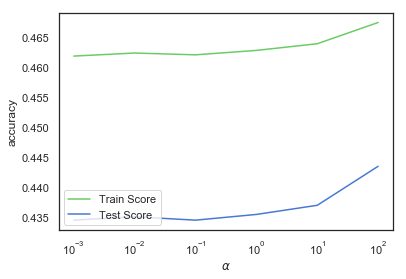

In [235]:
x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svm = LinearSVR(c)
    linear_svm.fit(X_train,y_train)
    train_score_list.append(linear_svm.score(X_train,y_train))
    test_score_list.append(linear_svm.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('accuracy')

# KNN Regressor

Mean squared error varying with k [166463.44863190502, 122600.60660815694, 110849.1768485057, 106287.183789365, 102757.00980898297, 101630.45660528883, 99410.76564854132, 95210.44463087249, 94550.01816478327, 95006.79865771811, 94824.54635053781, 94674.68486491137, 93876.99578131254, 93282.79450654812]


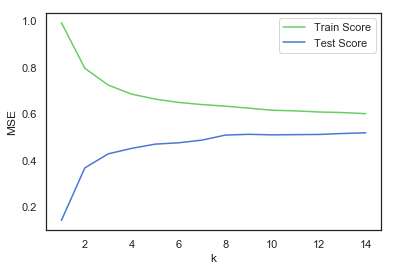

In [236]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_score_array = []
test_score_array = []
mean_squared=[]

for k in range(1,15):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    mean_squared.append(mean_squared_error(y_test,knn.predict(X_test)))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print('Mean squared error varying with k {}'.format(mean_squared))


In [237]:
knn=KNeighborsRegressor(3)
knn.fit(X_train, y_train)
print('Train score on best parameters {}'.format(knn.score(X_train,y_train)))
print('Test score on best parameters {}'.format(knn.score(X_test,y_test))) 

para_grid = {'n_neighbors': [1, 2,  3,  4,  5,  6,  7,  8,  9, 10]}
gridsearch = GridSearchCV(KNeighborsRegressor(), para_grid, cv=15, return_train_score=True)

gridsearch.fit(X_train, y_train)
print("Best parameters: {}".format(gridsearch.best_params_)) 

scores = cross_val_score(knn, X_test, y_test,cv=3)
print("Cross-validation scores test: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean())) 

Train score on best parameters 0.7248180506982088
Test score on best parameters 0.42901383535401005
Best parameters: {'n_neighbors': 10}
Cross-validation scores test: [0.43697747 0.38379574 0.36138243]
Average cross-validation score: 0.3941


Text(0.5, 1.0, 'Cost Vs. Rate')

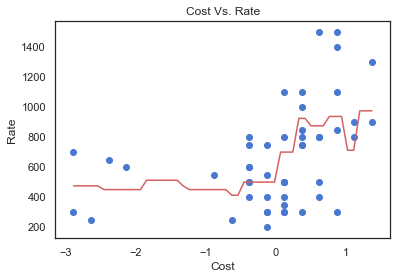

In [238]:
#Score and Audit_Risk
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn = KNeighborsRegressor(4)
knn.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Cost')
plt.ylabel('Rate')
plt.title('Cost Vs. Rate')

In [241]:
regmodel_perfo.loc['KNN Regression'] = pd.Series({'Train Score':train_score,'Test Score':test_score, 'Average CV Score':scores.mean(),'Best Parameters':gridsearch.best_params_})

In [242]:
regmodel_perfo

,Train Score,Test Score,Average CV Score,Best Parameters
Linear Regression,0.516127,0.488633,0.489593,
Ridge,0.516127,0.488633,0.508596,
Lasso,0.516127,0.488633,0.515000,{'alpha': 1}
Polynomial Regression,0.588100,0.556200,0.491079,"{'copy_X': True, 'fit_intercept': True, 'norma..."
Simple SVM,0.462362,0.435294,0.487191,{'C': 100}
KNN Regression,0.462362,0.435294,0.394052,{'n_neighbors': 10}


# Kernel SVM (rbf)

In [243]:
zomato_new=zomato[:1200]
zomato_new

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)__Buffet,listed_in(type)__Cafes,listed_in(type)__Delivery,listed_in(type)__Desserts,listed_in(type)__Dine-out,listed_in(type)__Drinks & nightlife,listed_in(type)__Pubs and bars,listed_in(city)__BTM,listed_in(city)__Indiranagar,listed_in(city)__Jayanagar,listed_in(city)__Koramangala 4th Block,listed_in(city)__Koramangala 5th Block,listed_in(city)__Koramangala 6th Block,listed_in(city)__Koramangala 7th Block,listed_in(city)__MG Road
8260,1,0,4.9,6375,1600.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8261,1,0,4.4,201,1300.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8262,0,0,4.2,3230,1600.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8263,1,0,4.4,1149,1100.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8264,0,1,3.9,420,800.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11041,0,1,4.2,522,450.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11043,0,1,3.8,53,350.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11047,0,0,3.5,59,700.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11048,0,1,4.3,165,500.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


Due to very complex model processing, we have taken sample of 1200 samples to run the model.

In [244]:
# target variable is 'approx_cost(for two people)'

Y = zomato_new["approx_cost(for two people)"]
X = zomato_new.drop('approx_cost(for two people)',axis=1)

In [245]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [246]:
#Shape of the train and test data

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (960, 19)
y_train shape:  (960,)
X_test shape:  (240, 19)
y_test shape (240,)


In [247]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10],
             }
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)
grid_search.fit(X_test, y_test)

train_score = grid_search.score(X_train, y_train)
print(train_score)

test_score = grid_search.score(X_test, y_test)
print(test_score)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

regmodel_perfo.loc['Kernelized SVR (rbf)'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':grid_search.best_score_,'Best Parameters':grid_search.best_params_})

0.44616760708649905
0.5685606206401277
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.4815


In [248]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='rbf',gamma=0.1,C=100), X_train, y_train)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.4f}".format(scores.mean()))

scores = cross_val_score(SVR(kernel='rbf',gamma=0.1,C=100), X_test, y_test)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.4f}".format(scores.mean()))

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Cross-validation scores: [0.51937321 0.52131007 0.45850537]
Average cross-validation score: 0.4997
Cross-validation scores: [0.40000134 0.53106163 0.52076253]
Average cross-validation score: 0.4839


C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



# Kernel SVR (poly)

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
             }
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, return_train_score=True)

grid_search.fit(X_train, y_train)
grid_search.fit(X_test, y_test)

print(grid_search.score(X_train, y_train))
print(grid_search.score(X_test, y_test))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

regmodel_perfo.loc['Kernelized SVR (poly)'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':grid_search.best_score_,'Best Parameters':grid_search.best_params_})

C:\Users\Vaibhav\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='poly',gamma=1,C=100), X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

scores = cross_val_score(SVR(kernel='poly',gamma=1,C=100), X_test, y_test)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

# Kernel SVR (Linear)

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
             }
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, return_train_score=True)

grid_search.fit(X_train, y_train)
grid_search.fit(X_test, y_test)

print(grid_search.score(X_train, y_train))
print(grid_search.score(X_test, y_test))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

regmodel_perfo.loc['Kernelized SVR (linear)'] = pd.Series({'Train Score':train_score,'Test Score':test_score,'Average CV Score':grid_search.best_score_,'Best Parameters':grid_search.best_params_})

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='linear',gamma=0.1,C=10), X_train, y_train)

print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

scores = cross_val_score(SVR(kernel='linear',gamma=0.1,C=10), X_test, y_test)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

In [ ]:
regmodel_perfo

Based test score and CV score, Lasso is performing better than other model. So, we can select lasso for regression. Thus, lasso model can be used to predict average cost of dining of two people.